In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#2 project Sale_Analytics

#1 data Preparation
#Load all CSV file 
customer = pd.read_csv("c:/Users/gotam/Downloads/customers.csv")
products = pd.read_csv("c:/Users/gotam/Downloads/products.csv")
discount = pd.read_csv("c:/Users/gotam/Downloads/discounts.csv")
order    = pd.read_csv("c:/Users/gotam/Downloads/orders.csv")


In [2]:
#Merge orders → products → customers → discounts
#step 1: merge orders with products
df1 = pd.merge(order,products, on="product_id", how="left")

#step 2: merge with customer
df2 = pd.merge(df1,customer,on="customer_id", how="left")

#step 3: merge with discounts
df3 = pd.merge(df2,discount, on="discount_code", how="left")



In [3]:
customer

,customer_id,customer_name,gender,city,signup_date
0,C001,Ali Khan,M,Karachi,2023-01-05
1,C002,Sara Ahmed,F,Lahore,2023-03-10
2,C003,Bilal Hussain,M,Islamabad,2023-02-21
3,C004,Ayesha Malik,F,Karachi,2023-05-12
4,C005,Omar Farooq,M,Multan,2023-06-15
5,C006,Fatima Noor,F,Lahore,2023-07-21
6,C007,Danish Raza,M,Faisalabad,2023-02-11
7,C008,Noor ul Ain,F,Karachi,2023-04-02
8,C009,Hamza Shaikh,M,Islamabad,2023-09-01
9,C010,Zoya Khalid,F,Peshawar,2023-03-29


In [4]:
products

,product_id,product_name,category,unit_price
0,P101,"Laptop Basic 14""",Electronics,65000
1,P102,"Laptop Pro 16""",Electronics,145000
2,P103,Wireless Mouse,Accessories,1800
3,P104,Mechanical Keyboard,Accessories,7800
4,P105,Office Chair,Furniture,18000
5,P106,Gaming Chair,Furniture,32000
6,P107,Smartphone A10,Mobile,32000
7,P108,Smartphone M20,Mobile,59000
8,P109,Tablet T9,Mobile,41000
9,P110,Headphones X2,Accessories,3500


In [5]:
discount

,discount_code,category,discount_percent
0,DISC10,Electronics,10
1,DISC05,Accessories,5
2,DISC15,Furniture,15
3,DISC08,Mobile,8


In [6]:
order

,order_id,order_date,customer_id,product_id,quantity,discount_code
0,O001,2023-02-03,C001,P101,1,DISC10
1,O002,2023-02-10,C003,P103,2,DISC05
2,O003,2023-03-18,C002,P108,1,DISC08
3,O004,2023-03-28,C007,P104,1,DISC05
4,O005,2023-04-05,C008,P105,1,DISC15
5,O006,2023-04-17,C001,P103,3,DISC05
6,O007,2023-05-20,C004,P102,1,DISC10
7,O008,2023-06-01,C005,P109,2,DISC08
8,O009,2023-06-15,C002,P110,1,DISC05
9,O010,2023-07-04,C006,P107,2,DISC08


In [7]:
#Create:

#total_price = unit_price * quantity
df3["total_price"] = df3["unit_price"] * df3["quantity"]



In [8]:
#discount_amount = total_price * (discount_percent / 100)
df3["discount_amount"] = df3["total_price"] * df3["discount_percent"] / 100

In [9]:
#net_revenue = total_price - discount_amount
df3["net_revenue"] = df3["total_price"] - df3["discount_amount"]

In [10]:
#2. Customer Insights

#Calculate total spend per customer
df3.groupby("customer_name")["total_price"].sum()



customer_name
Ali Khan         102400
Ayesha Malik     148600
Bilal Hussain    148600
Danish Raza        7800
Fatima Noor       64000
Hamza Shaikh      65000
Noor ul Ain       59000
Omar Farooq       82000
Sara Ahmed        62500
Zoya Khalid        3500
Name: total_price, dtype: int64

In [11]:
#Find top 5 customers by revenue
df3.groupby("customer_name")["total_price"].sum().nlargest(5)

customer_name
Ayesha Malik     148600
Bilal Hussain    148600
Ali Khan         102400
Omar Farooq       82000
Hamza Shaikh      65000
Name: total_price, dtype: int64

In [12]:
#Group by city → total revenue
df3.groupby("city")["net_revenue"].sum().sort_values(ascending=False)

city
Karachi       277770.0
Islamabad     192420.0
Lahore        116485.0
Multan         75440.0
Faisalabad      7410.0
Peshawar        3325.0
Name: net_revenue, dtype: float64

In [13]:
#3. Product Insights

#Category-wise revenue
df3.groupby("category_x")["net_revenue"].sum()

category_x
Accessories     26030.0
Electronics    378000.0
Furniture       42500.0
Mobile         226320.0
Name: net_revenue, dtype: float64

In [14]:
#Top-selling products (by quantity)
df3.groupby("product_name")["quantity"].sum().sort_values(ascending=False)

product_name
Wireless Mouse         7
Tablet T9              3
Headphones X2          2
Laptop Basic 14"       2
Laptop Pro 16"         2
Smartphone A10         2
Gaming Chair           1
Mechanical Keyboard    1
Office Chair           1
Smartphone M20         1
Name: quantity, dtype: int64

In [15]:
#Which category gives highest revenue after discount?
df3.groupby("category_x")["net_revenue"].sum().nlargest(1)

category_x
Electronics    378000.0
Name: net_revenue, dtype: float64

In [16]:
#4. Time Series Analytics

#Convert order_date → datetime
df3["order_date"] = pd.to_datetime(df3["order_date"])




In [17]:
#Extract month & year
df3["Year"] = df3["order_date"].dt.year
df3["Month"] = df3["order_date"].dt.month


In [18]:
#Monthly revenue (line chart)

#step:1 aggregate the monthly revenue

#i ensure order_date is datetime

#ii extract year-month for grouping
df3["year_month"] = df3["order_date"].dt.to_period("M")

#iii calculate monthly revenue
monthly_revenue = df3.groupby("year_month")["net_revenue"].sum()



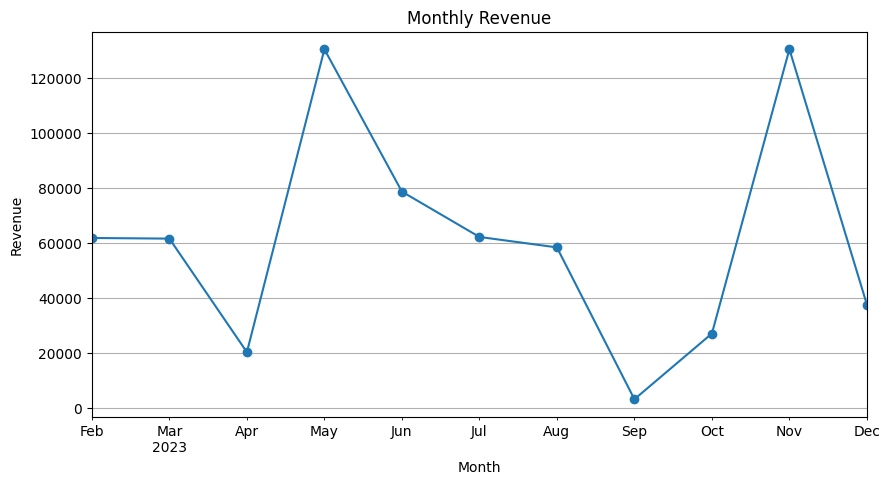

In [19]:
#Monthly revenue (line chart)
monthly_revenue.plot(kind="line", marker = "o", figsize=(10,5))
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [20]:
#5. Discount Analysis

#Total discount amount given
df3["discount_amount"].sum()

np.float64(70550.0)

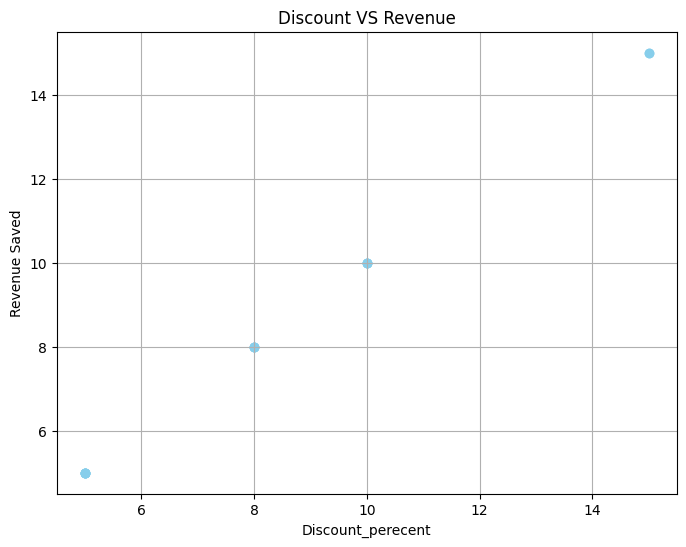

In [21]:
#Discount percent vs revenue saved

#1 calculate discount amount
df3["discount_amount"] = (df3["discount_amount"] / df3["total_price"]) * 100
plt.figure(figsize=(8,6))
plt.title("Discount VS Revenue")
plt.scatter(df3["discount_percent"], df3["discount_amount"], color="skyblue")
plt.xlabel("Discount_perecent")
plt.ylabel("Revenue Saved")
plt.grid(True)
plt.show()

In [22]:
#Which category uses discounts the most?
df3.groupby("category_x")["discount_amount"].sum()

category_x
Accessories    30.0
Electronics    40.0
Furniture      30.0
Mobile         32.0
Name: discount_amount, dtype: float64

In [23]:
#6. Customer Segmentation

"""Create spending brackets:

Low (<40k)

Medium (40k–100k)

High (>100k)"""
df3["spending_brackets"] = np.where(df3["total_price"] < 40000, "Low",
                             np.where(df3["total_price"] <= 100000, "Medium", "High"))

In [24]:
#Count customers in each bracket
df3["spending_brackets"].value_counts

<bound method IndexOpsMixin.value_counts of 0     Medium
1        Low
2     Medium
3        Low
4        Low
5        Low
6       High
7     Medium
8        Low
9     Medium
10       Low
11    Medium
12       Low
13       Low
14      High
15    Medium
Name: spending_brackets, dtype: object>

In [25]:
#Identify which bracket gives highest revenue
df3.groupby("spending_brackets")["net_revenue"].max().nlargest(1)



spending_brackets
High    130500.0
Name: net_revenue, dtype: float64